In [2]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

## Merging The files

In [5]:
#merging back the reviews file into 1 file
df_reviews_1 = pd.read_csv("C:\\Users\\rodri\OneDrive\\Documentos\\GitHub\\Project-Data-Science\\#final\\Data_files\\reviews_1.csv", sep=",")
df_reviews_2 = pd.read_csv("C:\\Users\\rodri\OneDrive\\Documentos\\GitHub\\Project-Data-Science\\#final\\Data_files\\reviews_2.csv", sep=",")
df_reviews_3 = pd.read_csv("C:\\Users\\rodri\OneDrive\\Documentos\\GitHub\\Project-Data-Science\\#final\\Data_files\\reviews_3.csv", sep=",")
df_reviews_4 = pd.read_csv("C:\\Users\\rodri\OneDrive\\Documentos\\GitHub\\Project-Data-Science\\#final\\Data_files\\reviews_4.csv", sep=",")

dfs= [df_reviews_1, df_reviews_2, df_reviews_3, df_reviews_4]
reviews = pd.concat(dfs)

## Cleaning comments process

In [4]:
#Select the variable needed.
reviews = reviews[["listing_id","comments"]]

#Nr of comments
len(reviews)


888619

In [5]:
#Clear null coments
reviews= reviews.dropna()

#nr of comments w/o null
len(reviews)

888179

In [6]:
#lower case
reviews.astype(str)
reviews["lowerCase"]=reviews["comments"].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [7]:
#eliminate <br/>
reviews["lowerCase"] = reviews["lowerCase"].str.replace('<br/>', '')

In [8]:
#remove punctuation
reviews["punctuation"] = reviews["lowerCase"].str.replace('[^\w\s]', '')

C:\Users\rodri\AppData\Local\Temp/ipykernel_15232/2389494516.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews["punctuation"] = reviews["lowerCase"].str.replace('[^\w\s]', '')


Getting an overall view of the transformations done so far.

In [9]:
reviews.head()

,listing_id,comments,lowerCase,punctuation
0,6499,"Ola Bruno,\r<br/>\r<br/>Tive um mes Fantástico...","ola bruno, tive um mes fantástico em seu apar...",ola bruno tive um mes fantástico em seu apart...
1,6499,Encontramos o apartamento de Bruno exatamente ...,encontramos o apartamento de bruno exatamente ...,encontramos o apartamento de bruno exatamente ...
2,6499,Estivemos em Lisboa por aproximadamente 03 (tr...,estivemos em lisboa por aproximadamente 03 (tr...,estivemos em lisboa por aproximadamente 03 trê...
3,6499,Superbe quartier très proche du tram et du tra...,superbe quartier très proche du tram et du tra...,superbe quartier très proche du tram et du tra...
4,6499,"Très bel appartement, bien situé et à proximit...","très bel appartement, bien situé et à proximit...",très bel appartement bien situé et à proximité...


In [10]:
#checking the languages available in stopwords
stopwords.fileids()

['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [11]:
#Storing english stopwords 
stop_wordsEn = stopwords.words("english")

'''
stop_wordsGer = stopwords.words("german")
stop_wordsFr = stopwords.words("french")
stop_wordsPt = stopwords.words("portuguese")
stop_wordsEs = stopwords.words("spanish")
stop_wordsGr = stopwords.words("greek")
'''
#removing stop words for each language

'\nstop_wordsGer = stopwords.words("german")\nstop_wordsFr = stopwords.words("french")\nstop_wordsPt = stopwords.words("portuguese")\nstop_wordsEs = stopwords.words("spanish")\nstop_wordsGr = stopwords.words("greek")\n'

In [12]:
#removing the english stopwords from the comments
reviews["w/o_stopwords"]= reviews["punctuation"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_wordsEn))

In [13]:
#nr of words of each comment
reviews["word_count"] = reviews["w/o_stopwords"].apply(lambda x: len(x.split()))

In [14]:
#nr of characters in a comment
reviews["chars_count"] = reviews["w/o_stopwords"].apply(lambda x: len(x))

In [15]:
#average length of words per comment
reviews["avg_len_word"]=reviews["chars_count"]/reviews["word_count"]

In [16]:
#nr of stop words per comment
reviews["stop_word_count"] = reviews["punctuation"].apply(lambda x: len(x.split())) - reviews["word_count"]

In [17]:
#stop words rate per comment
reviews["stop_words_rate"] = reviews["stop_word_count"] /reviews["punctuation"].apply(lambda x: len(x.split())) * 100 

The code below was executed to identify anomalies in the comments.


In [18]:
reviews.sort_values(by="stop_words_rate").tail(30)

,listing_id,comments,lowerCase,punctuation,w/o_stopwords,word_count,chars_count,avg_len_word,stop_word_count,stop_words_rate
221649,48850859,.,.,,,0,0,NaN,0,NaN
221824,48900392,.,.,,,0,0,NaN,0,NaN
221840,48900473,:),:),,,0,0,NaN,0,NaN
221893,48903952,.,.,,,0,0,NaN,0,NaN
222105,48990370,.,.,,,0,0,NaN,0,NaN
222774,49216474,.,.,,,0,0,NaN,0,NaN
222846,49225939,.,.,,,0,0,NaN,0,NaN
223190,49439837,.,.,,,0,0,NaN,0,NaN
223339,49478123,.,.,,,0,0,NaN,0,NaN
223515,49560852,.,.,,,0,0,NaN,0,NaN


In [19]:
#gives an overview of how the file looks like after all transformations
reviews.head()

,listing_id,comments,lowerCase,punctuation,w/o_stopwords,word_count,chars_count,avg_len_word,stop_word_count,stop_words_rate
0,6499,"Ola Bruno,\r<br/>\r<br/>Tive um mes Fantástico...","ola bruno, tive um mes fantástico em seu apar...",ola bruno tive um mes fantástico em seu apart...,ola bruno tive um mes fantástico em seu aparta...,83,552,6.650602,5,5.681818
1,6499,Encontramos o apartamento de Bruno exatamente ...,encontramos o apartamento de bruno exatamente ...,encontramos o apartamento de bruno exatamente ...,encontramos apartamento de bruno exatamente co...,127,835,6.574803,15,10.563380
2,6499,Estivemos em Lisboa por aproximadamente 03 (tr...,estivemos em lisboa por aproximadamente 03 (tr...,estivemos em lisboa por aproximadamente 03 trê...,estivemos em lisboa por aproximadamente 03 trê...,113,794,7.026549,18,13.740458
3,6499,Superbe quartier très proche du tram et du tra...,superbe quartier très proche du tram et du tra...,superbe quartier très proche du tram et du tra...,superbe quartier très proche du tram et du tra...,25,173,6.920000,0,0.000000
4,6499,"Très bel appartement, bien situé et à proximit...","très bel appartement, bien situé et à proximit...",très bel appartement bien situé et à proximité...,très bel appartement bien situé et à proximité...,42,245,5.833333,1,2.325581


In [20]:
#dropping nas to remove the anomalies, coments with just punctuation that ends up becoming nas with clean
Comments_final =reviews.dropna()


In [21]:
#Final nr of comments left to analyse
len(Comments_final)

886283

In [22]:
#Taking a look at all the words and storing them
pd.Series(" ".join(reviews["w/o_stopwords"]).split()).value_counts()

de               381010
apartment        363930
great            320709
place            238919
et               237854
                  ...  
hellostaying          1
arrang                1
placecons             1
itpro                 1
certezaespero         1
Length: 477773, dtype: int64

In [23]:
words= " ".join(reviews["w/o_stopwords"]).split()

In [24]:
#Getting the top 30 most common words
import nltk
fd= nltk.FreqDist(words)
fd.most_common(30)

[('de', 381010),
 ('apartment', 363930),
 ('great', 320709),
 ('place', 238919),
 ('et', 237854),
 ('stay', 234013),
 ('location', 226080),
 ('très', 192398),
 ('la', 190830),
 ('us', 181993),
 ('lisbon', 177367),
 ('nice', 166174),
 ('clean', 158557),
 ('à', 156175),
 ('e', 151935),
 ('est', 136634),
 ('un', 132637),
 ('host', 128677),
 ('everything', 126823),
 ('en', 122742),
 ('recommend', 122200),
 ('bien', 120863),
 ('really', 119023),
 ('would', 118321),
 ('perfect', 116273),
 ('good', 115652),
 ('nous', 109461),
 ('le', 105835),
 ('well', 103667),
 ('que', 99457)]

### Word Cloud

The code related to the word cloud is tagged as comment since it was meant to be runned only once to create the word cloud.

In [25]:
#word cloud
#wc = WordCloud(background_color= "white", height = 600, width = 400)

#wc.generate(words)

In [26]:
#wc.to_file("wordcloud_output.png")

## Sentiment Analysis

In [27]:
from textblob import TextBlob

In [28]:
#Reorganizing the index 
Index=[]
for i in range(len(Comments_final["w/o_stopwords"])):
    Index.append(i)
    
Comments_final["Index"]= Index
Comments_final=Comments_final.set_index("Index")

C:\Users\rodri\AppData\Local\Temp/ipykernel_15232/2820300574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Comments_final["Index"]= Index


In [29]:
#Transforming the fianl comment column into string type, for the sentiment analysis
Comments_final["w/o_stopwords"]=Comments_final["w/o_stopwords"].astype('str')

#Creating a function that will extract the polarity of a comment
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#Aplying the function to all the rows of the comment and storing the value in a new column
Comments_final['Polarity'] = Comments_final['w/o_stopwords'].apply(get_polarity)

In [30]:
#Adding a new column that identifies the sentiment type for each comment
Comments_final['Sentiment_Type']=''
Comments_final.loc[Comments_final.Polarity>0,'Sentiment_Type']='POSITIVE'
Comments_final.loc[Comments_final.Polarity==0,'Sentiment_Type']='NEUTRAL'
Comments_final.loc[Comments_final.Polarity<0,'Sentiment_Type']='NEGATIVE'

Final look to the main comments dataframe, it contains all transformation done, step by step, some metrics calculated and the polarity obtained.

In [40]:
Comments_final[5:10]

,listing_id,comments,lowerCase,punctuation,w/o_stopwords,word_count,chars_count,avg_len_word,stop_word_count,stop_words_rate,Polarity,Sentiment_Type
Index,,,,,,,,,,,,
5,6499,We had a great time in Lisbon. Bruno's apartme...,we had a great time in lisbon. bruno's apartme...,we had a great time in lisbon brunos apartment...,great time lisbon brunos apartment located nic...,28,196,7.000000,18,39.130435,0.484762,POSITIVE
6,6499,Bruno is an excellent host! We loved our stay!...,bruno is an excellent host! we loved our stay!...,bruno is an excellent host we loved our stay i...,bruno excellent host loved stay recommend plac...,8,54,6.750000,7,46.666667,0.850000,POSITIVE
7,6499,I thoroughly enjoyed my stay in Lisbon and in ...,i thoroughly enjoyed my stay in lisbon and in ...,i thoroughly enjoyed my stay in lisbon and in ...,thoroughly enjoyed stay lisbon brunos apartmen...,52,340,6.538462,43,45.263158,0.204167,POSITIVE
8,6499,Ótima estadia!! Localização excelente em Belém...,ótima estadia!! localização excelente em belém...,ótima estadia localização excelente em belém p...,ótima estadia localização excelente em belém p...,22,184,8.363636,1,4.347826,0.000000,NEUTRAL
9,6499,I really enjoyed staying at Bruno's place. It ...,i really enjoyed staying at bruno's place. it ...,i really enjoyed staying at brunos place it is...,really enjoyed staying brunos place walking di...,37,255,6.891892,38,50.666667,0.318571,POSITIVE


In [38]:
Comments_final.describe()

,listing_id,word_count,chars_count,avg_len_word,stop_word_count,stop_words_rate,Polarity
count,8.862830e+05,886283.000000,886283.000000,886283.000000,886283.000000,886283.000000,886283.000000
mean,1.546126e+07,31.724475,209.928284,6.985889,15.559936,28.121726,0.301023
std,1.163786e+07,30.632131,194.186087,5.079232,22.076178,20.942829,0.263570
min,6.499000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000
25%,5.454681e+06,12.000000,84.000000,6.250000,1.000000,4.347826,0.000000
50%,1.406515e+07,23.000000,159.000000,6.771429,7.000000,36.363636,0.333333
75%,2.282966e+07,41.000000,274.000000,7.266667,22.000000,47.058824,0.480000
max,5.356747e+07,893.000000,5299.000000,738.000000,534.000000,83.333333,1.000000


The next code was created to separate the listing id and the polarity into a new dataframe so we could add polarity as a new feature in our classification and regressions.

In [32]:
CommentScore=Comments_final[["listing_id","Polarity"]]

#grouping the data by id to match the merging
CommentScore=CommentScore.groupby(["listing_id"]) 
Score=CommentScore["Polarity"].mean()

In [33]:
#gives an overall view of the polarity obtained
Score.describe()

count    16017.000000
mean         0.283049
std          0.123869
min         -0.800000
25%          0.221354
50%          0.289618
75%          0.350952
max          1.000000
Name: Polarity, dtype: float64

In [34]:
#export the data frame to a csv file
#Score.to_csv("sentiment.csv")

## Visualization

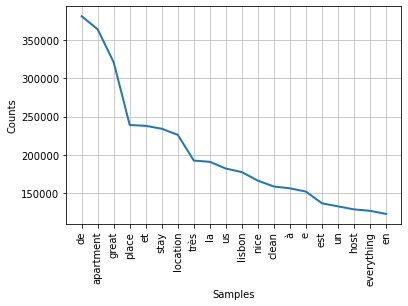

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
#Ploting the top 20 frequency words
common = fd.most_common()
fd.plot(20, cumulative = False)

<AxesSubplot:title={'center':'Sentiment Analysis'}>

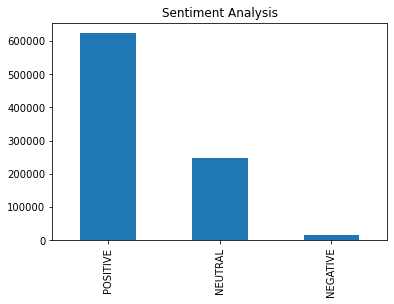

In [36]:
#Ploting the amount of comments for each type of sentiment
Comments_final.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")